In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
music = pd.read_csv('train.csv')

In [3]:
music.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [4]:
music.shape

(17996, 17)

In [5]:
music.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [6]:
music = music.dropna()
music.shape

(11813, 17)

In [7]:
music.describe(include = 'all')

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,11813,11813,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,1.181300e+04,11813.000000,11813.000000
unique,6703,10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,The Rolling Stones,Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,30,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,43.100652,0.524944,0.670305,5.972573,-8.215807,0.623974,0.071107,0.239968,0.178991,0.195096,0.470115,122.928641,2.129446e+05,3.913824,6.622619
std,NaN,NaN,16.568500,0.166013,0.242324,3.167348,4.239682,0.484407,0.067783,0.319142,0.303809,0.159743,0.244635,29.430883,1.158561e+05,0.381625,3.246656
min,NaN,NaN,1.000000,0.064400,0.000020,1.000000,-36.214000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,NaN,NaN,32.000000,0.413000,0.513000,3.000000,-9.994000,0.000000,0.034600,0.001890,0.000096,0.096900,0.271000,100.001000,1.755330e+05,4.000000,5.000000
50%,NaN,NaN,42.000000,0.527000,0.716000,6.000000,-7.314000,1.000000,0.046300,0.056100,0.004290,0.127000,0.462000,120.046000,2.178830e+05,4.000000,8.000000
75%,NaN,NaN,54.000000,0.638000,0.875000,9.000000,-5.341000,1.000000,0.076500,0.421000,0.209000,0.256000,0.660000,141.877000,2.635870e+05,4.000000,10.000000


In [8]:
music.groupby('Class').size()

Class
0      386
1     1037
2      956
3      270
4      148
5      517
6     2039
7      464
8     1523
9     1099
10    3374
dtype: int64

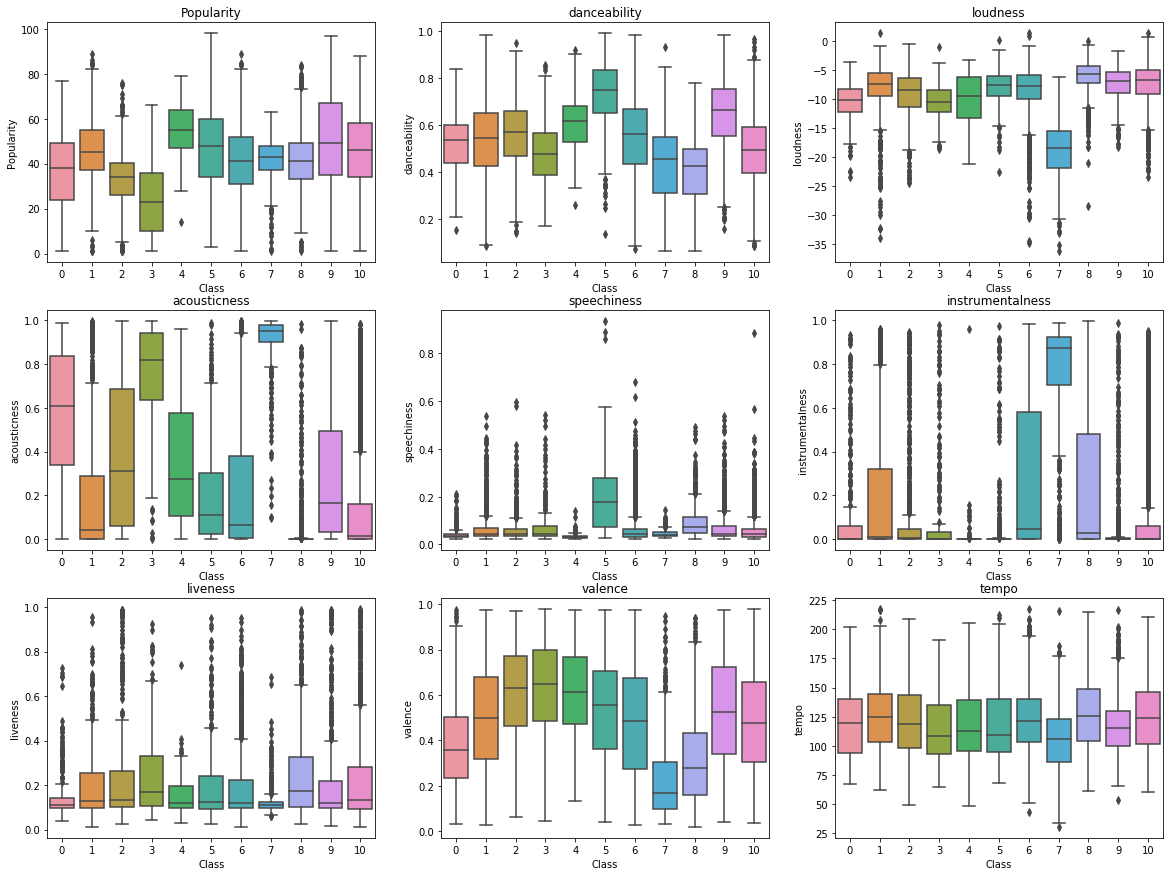

In [9]:
l = list(range(0,11))
labels = ['Hiphop', 'Instrumental', 'Rock']
music1 = music[music['Class'].isin(l)]

fig, ax = plt.subplots(ncols = 3,nrows = 3, figsize=(20, 15))
g = sns.boxplot(data = music1, x = 'Class', y='Popularity', ax = ax[0,0])
g.set_title('Popularity')
#g.set_xticklabels(labels)
f = sns.boxplot(data = music1, x = 'Class', y='danceability', ax = ax[0,1])
f.set_title('danceability')
#f.set_xticklabels(labels)
g = sns.boxplot(data = music1, x = 'Class', y='loudness', ax = ax[0,2])
g.set_title('loudness')
#g.set_xticklabels(labels)
f = sns.boxplot(data = music1, x = 'Class', y='acousticness', ax = ax[1,0])
f.set_title('acousticness')
#f.set_xticklabels(labels)
g = sns.boxplot(data = music1, x = 'Class', y='speechiness', ax = ax[1,1])
g.set_title('speechiness')
#g.set_xticklabels(labels)
f = sns.boxplot(data = music1, x = 'Class', y='instrumentalness', ax = ax[1,2])
f.set_title('instrumentalness')
#f.set_xticklabels(labels)
g = sns.boxplot(data = music1, x = 'Class', y='liveness', ax = ax[2,0])
g.set_title('liveness')
#g.set_xticklabels(labels)
f = sns.boxplot(data = music1, x = 'Class', y='valence', ax = ax[2,1])
f.set_title('valence')
#f.set_xticklabels(labels)
f = sns.boxplot(data = music1, x = 'Class', y='tempo', ax = ax[2,2])
f.set_title('tempo')
#f.set_xticklabels(labels)
plt.show()

In [10]:
music1.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [11]:
music1.Class

1        10
2         6
4        10
5         6
6         2
         ..
17991     6
17992     2
17993     8
17994     8
17995    10
Name: Class, Length: 11813, dtype: int64

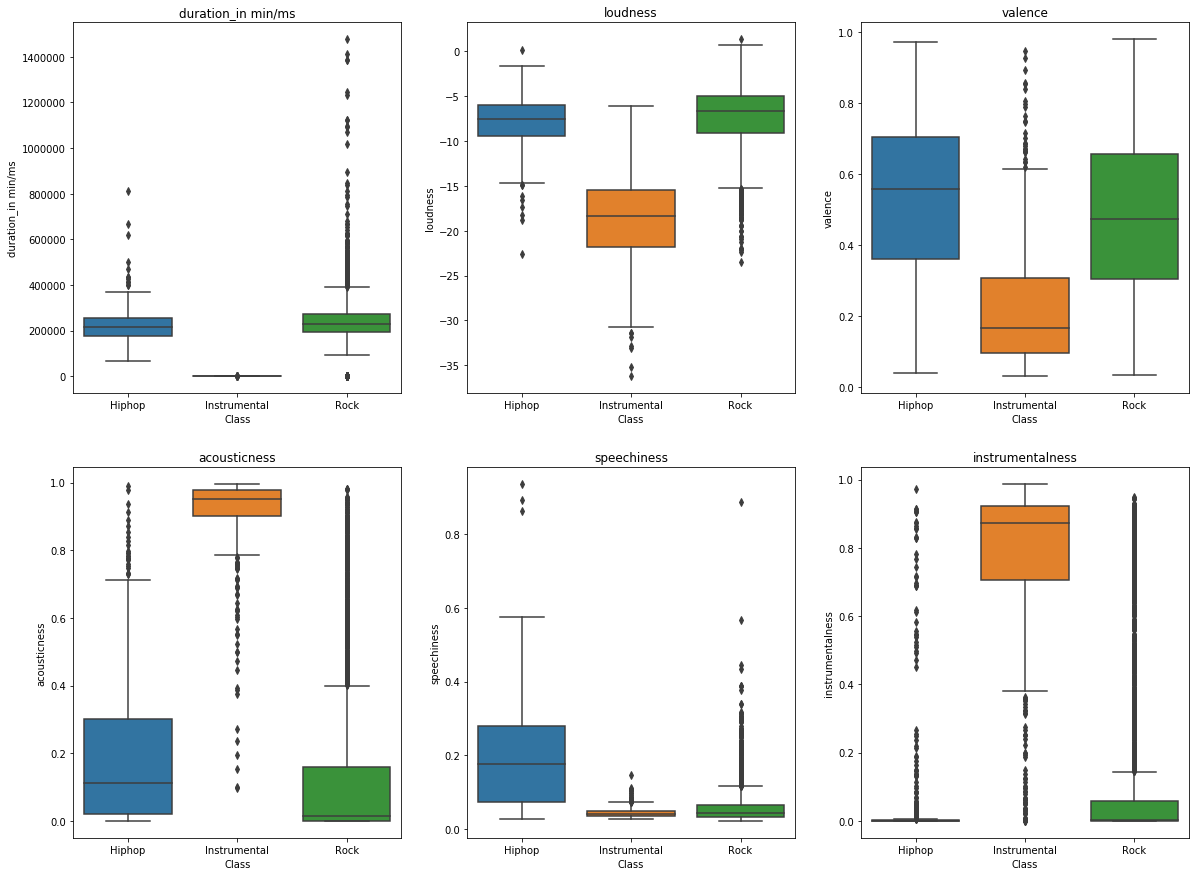

In [12]:
l = [5, 7, 10]
labels = ['Hiphop', 'Instrumental', 'Rock']
music1 = music[music['Class'].isin(l)]

fig, ax = plt.subplots(ncols = 3,nrows = 2, figsize=(20, 15))
f = sns.boxplot(data = music1, x = 'Class', y='duration_in min/ms', ax = ax[0,0])
f.set_title('duration_in min/ms')
f.set_xticklabels(labels)

g = sns.boxplot(data = music1, x = 'Class', y='loudness', ax = ax[0,1])
g.set_title('loudness')
g.set_xticklabels(labels)

f = sns.boxplot(data = music1, x = 'Class', y='acousticness', ax = ax[1,0])
f.set_title('acousticness')
f.set_xticklabels(labels)

g = sns.boxplot(data = music1, x = 'Class', y='speechiness', ax = ax[1,1])
g.set_title('speechiness')
g.set_xticklabels(labels)

f = sns.boxplot(data = music1, x = 'Class', y='instrumentalness', ax = ax[1,2])
f.set_title('instrumentalness')
f.set_xticklabels(labels)

f = sns.boxplot(data = music1, x = 'Class', y='valence', ax = ax[0,2])
f.set_title('valence')
f.set_xticklabels(labels)

plt.show()

In [13]:
music.loc[music.Class == 10, 'class'] = 0 # Rock Music
music.loc[music.Class == 7, 'class'] = 1 # Instrumental Music Genre
music.loc[music.Class == 5, 'class'] = 2 # HipHop Music Genre
# music.loc[music.Class == 9, 'class'] = 1 # Pop
# music.loc[music.Class == 8, 'class'] = 2 # Metal Music Genre
# music1_scale.loc[music1_scale.Class == 9, 'class'] = 3
# music1_scale.loc[music1_scale.Class == 1, 'class'] = 4
# music1_scale['class'].fillna(3,inplace = True)

In [14]:
music = music.dropna()
music = music.drop('Class', axis=1)
len(music)

4355

In [15]:
music.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,class
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.00401,0.101,0.5690,116.454,251733.00000,4,0.0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.01610,0.172,0.0918,199.060,229960.00000,4,0.0
13,"Harald Lassen, Bram de Looze",How it feels pt. 2,34.0,0.462,0.374,11.0,-12.069,0,0.0331,0.949000,0.92900,0.131,0.1740,122.939,4.44025,3,1.0
14,Buffalo Springfield,For What It's Worth,76.0,0.653,0.519,2.0,-10.164,1,0.0497,0.406000,0.02090,0.101,0.8220,98.883,153693.00000,4,0.0
17,Velvet Two Stripes,Drinks,31.0,0.564,0.801,1.0,-4.730,0,0.0473,0.002330,0.00780,0.067,0.4010,105.010,154293.00000,4,0.0


In [16]:
music.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,class
count,4355.000000,4355.000000,4355.000000,4355.00000,4355.000000,4355.000000,4355.000000,4355.000000,4355.000000,4355.000000,4355.000000,4355.000000,4.355000e+03,4355.000000,4355.000000
mean,45.581630,0.513595,0.663090,5.92147,-8.583677,0.627325,0.073866,0.225161,0.175018,0.194848,0.462824,122.636949,2.143531e+05,3.919173,0.343972
std,16.274769,0.166237,0.257625,3.16486,4.949768,0.483572,0.075667,0.322621,0.308502,0.163036,0.240305,29.957100,1.230677e+05,0.378435,0.680581
min,1.000000,0.064400,0.005730,1.00000,-36.214000,0.000000,0.022500,0.000001,0.000001,0.011900,0.030800,30.557000,9.871167e-01,1.000000,0.000000
25%,34.000000,0.403000,0.517000,3.00000,-10.326000,0.000000,0.034600,0.001855,0.000067,0.095000,0.267000,98.797000,1.763395e+05,4.000000,0.000000
50%,45.000000,0.511000,0.727000,6.00000,-7.261000,1.000000,0.045900,0.039200,0.002600,0.125000,0.450000,120.014000,2.197570e+05,4.000000,0.000000
75%,57.000000,0.618000,0.872500,9.00000,-5.239000,1.000000,0.075350,0.344500,0.168500,0.254000,0.644000,142.433000,2.647335e+05,4.000000,0.000000
max,98.000000,0.989000,0.999000,11.00000,1.355000,1.000000,0.935000,0.996000,0.987000,0.992000,0.980000,216.020000,1.477187e+06,5.000000,2.000000


In [17]:
music.groupby('class').size()

class
0.0    3374
1.0     464
2.0     517
dtype: int64

In [18]:
music_cate = music[['key', 'mode', 'time_signature', 'class']]
music_cate.head()

,key,mode,time_signature,class
1,3.0,1,4,0.0
4,2.0,1,4,0.0
13,11.0,0,3,1.0
14,2.0,1,4,0.0
17,1.0,0,4,0.0


In [19]:
music1 = music.drop(columns=['Artist Name','Track Name','mode','class','time_signature','key'])
music1.head()

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
1,54.0,0.382,0.814,-7.230,0.0406,0.001100,0.00401,0.101,0.5690,116.454,251733.00000
4,53.0,0.167,0.975,-4.279,0.2160,0.000169,0.01610,0.172,0.0918,199.060,229960.00000
13,34.0,0.462,0.374,-12.069,0.0331,0.949000,0.92900,0.131,0.1740,122.939,4.44025
14,76.0,0.653,0.519,-10.164,0.0497,0.406000,0.02090,0.101,0.8220,98.883,153693.00000
17,31.0,0.564,0.801,-4.730,0.0473,0.002330,0.00780,0.067,0.4010,105.010,154293.00000


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
music1_scale = pd.DataFrame(sc.fit_transform(music1), columns=music1.columns)

In [21]:
music1_corr = music1_scale.corr()

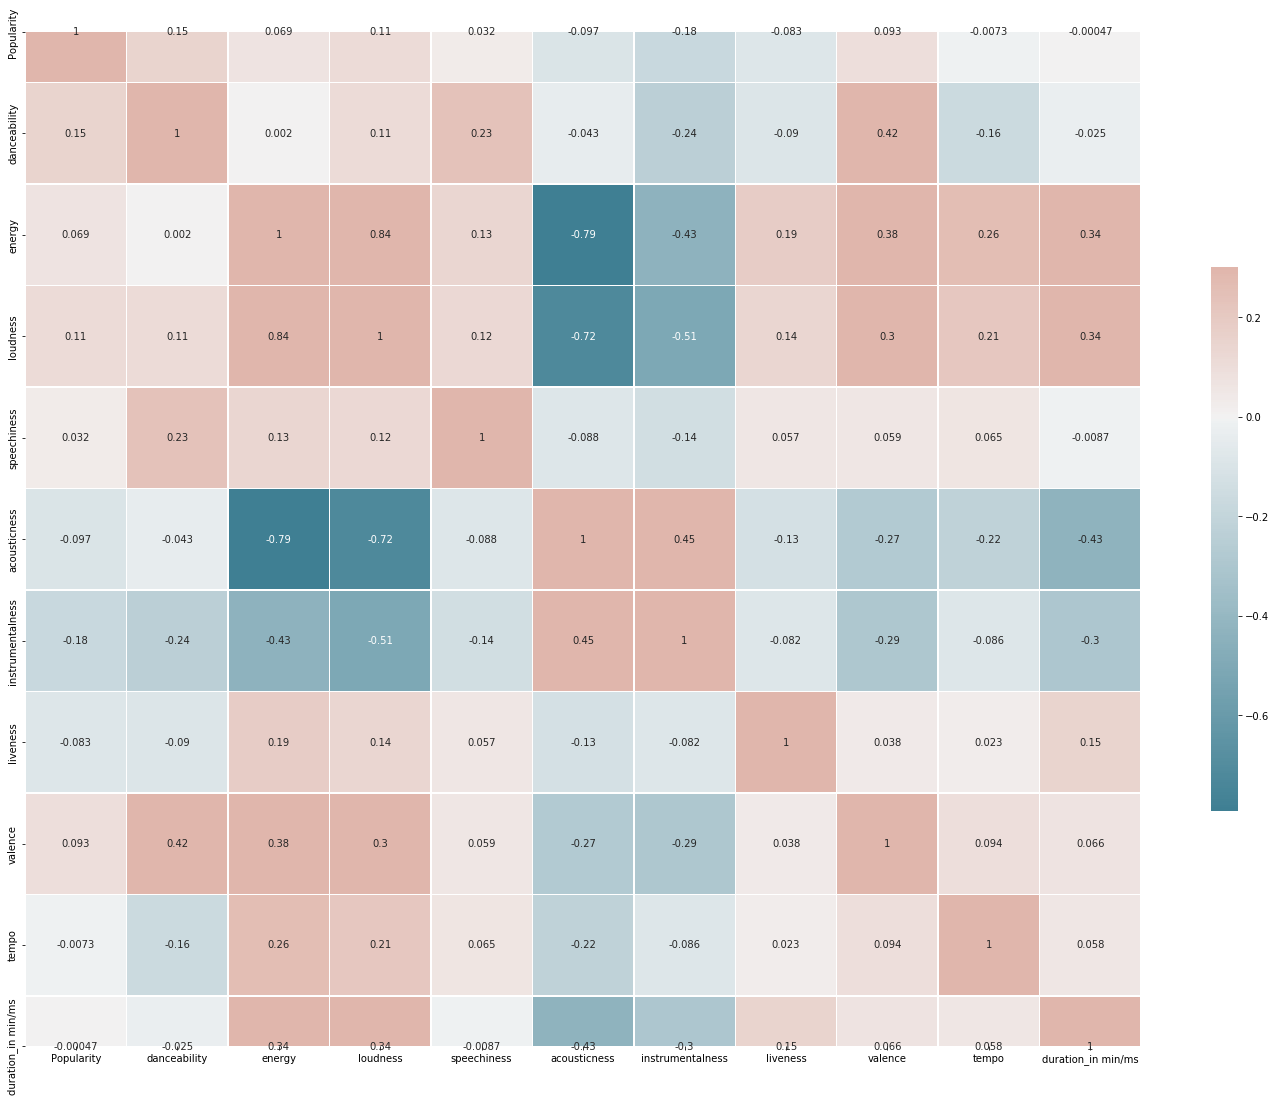

In [22]:
f, ax = plt.subplots(figsize=(25,20))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(music1_corr, cmap=cmap, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

In [23]:
music1_scale.head()

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,0.517324,-0.791699,0.585840,0.273514,-0.439691,-0.694581,-0.554381,-0.575696,0.441888,-0.206417,0.303769
1,0.455873,-2.085178,1.210851,0.869772,1.878642,-0.697467,-0.515187,-0.140160,-1.544146,2.551376,0.126830
2,-0.711713,-0.310404,-1.122263,-0.704220,-0.538821,2.243876,2.444287,-0.391667,-1.202042,0.010084,-1.741914
3,1.869265,0.838686,-0.559365,-0.319309,-0.319413,0.560595,-0.499626,-0.575696,1.494836,-0.793023,-0.492957
4,-0.896068,0.303246,0.535374,0.778646,-0.351134,-0.690768,-0.542094,-0.784263,-0.257302,-0.588474,-0.488081


In [24]:
music1_scale['class'] = music['class'].tolist() 
music1_scale['key'] = music['key'].tolist() 
music1_scale['mode'] = music['mode'].tolist() 
music1_scale['time_signature'] = music['time_signature'].tolist()
music1_scale 

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,class,key,mode,time_signature
0,0.517324,-0.791699,0.585840,0.273514,-0.439691,-0.694581,-0.554381,-0.575696,0.441888,-0.206417,0.303769,0.0,3.0,1,4
1,0.455873,-2.085178,1.210851,0.869772,1.878642,-0.697467,-0.515187,-0.140160,-1.544146,2.551376,0.126830,0.0,2.0,1,4
2,-0.711713,-0.310404,-1.122263,-0.704220,-0.538821,2.243876,2.444287,-0.391667,-1.202042,0.010084,-1.741914,1.0,11.0,0,3
3,1.869265,0.838686,-0.559365,-0.319309,-0.319413,0.560595,-0.499626,-0.575696,1.494836,-0.793023,-0.492957,0.0,2.0,1,4
4,-0.896068,0.303246,0.535374,0.778646,-0.351134,-0.690768,-0.542094,-0.784263,-0.257302,-0.588474,-0.488081,0.0,1.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4350,-0.035742,-0.376582,0.869230,0.480012,-0.057708,-0.697232,-0.492494,0.050004,-0.111638,-0.990962,0.211240,0.0,8.0,0,4
4351,-1.018972,0.730395,0.030707,-0.165749,-0.610195,-0.285696,-0.567137,0.350586,1.099461,0.045572,0.270182,0.0,10.0,0,4
4352,-0.097194,0.062599,-0.194452,-0.291223,-0.637952,-0.656142,1.549540,-0.667711,-0.082505,-0.675642,1.207660,0.0,1.0,1,4
4353,0.824584,-1.513641,0.609133,-0.613700,-0.410613,-0.666062,-0.271077,-0.575696,-0.869094,1.087014,0.259886,0.0,7.0,1,4


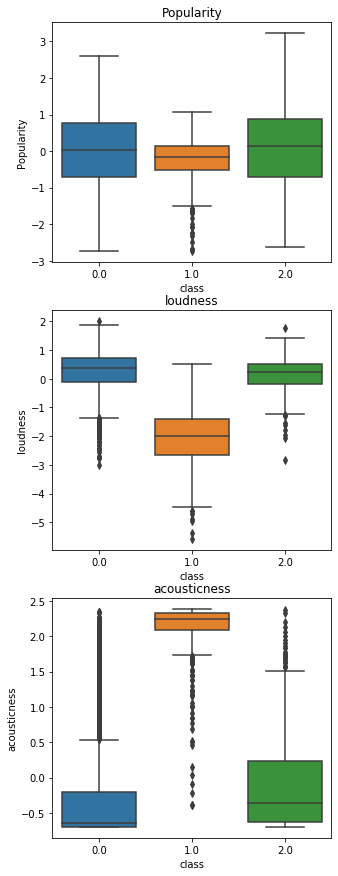

In [25]:
fig, ax = plt.subplots(ncols = 1,nrows = 3, figsize=(5, 15))
g = sns.boxplot(data = music1_scale, x = 'class', y='Popularity', ax = ax[0])
g.set_title('Popularity')
#f = sns.boxplot(data = music1_scale, x = 'class', y='danceability', ax = ax[0,1])
#f.set_title('danceability')
g = sns.boxplot(data = music1_scale, x = 'class', y='loudness', ax = ax[1])
g.set_title('loudness')
f = sns.boxplot(data = music1_scale, x = 'class', y='acousticness', ax = ax[2])
f.set_title('acousticness')
plt.show()

/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `

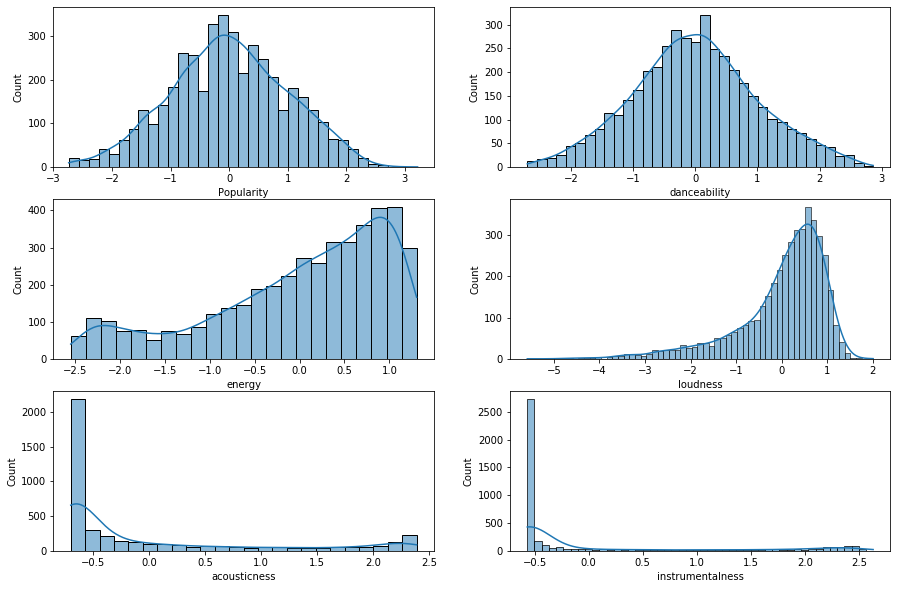

In [26]:
fig, ax = plt.subplots(ncols = 2,nrows = 3, figsize=(15, 10))
g = sns.histplot(data = music1_scale, x = 'Popularity',kde=True,ax = ax[0,0])
g.set(xlim=(-3,3.5))
sns.histplot(data = music1_scale, x = 'danceability',kde=True,ax = ax[0,1])
sns.histplot(data = music1_scale, x = 'energy',kde=True,ax = ax[1,0])
sns.histplot(data = music1_scale, x = 'loudness',kde=True,ax = ax[1,1])
sns.histplot(data = music1_scale, x = 'acousticness',kde=True,ax = ax[2,0])
sns.histplot(data = music1_scale, x = 'instrumentalness',kde=True,ax = ax[2,1])
plt.show()

- logistic regression
- KNN
- decision tree
- rf 
- NN
- svm
- pca
- sdm
- hierarchical clustering

In [27]:
# music1_scale.to_csv('music_scale.csv')

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(music1_scale, music1_scale["class"]):
    strat_train_set = music1_scale.iloc[train_index]
    strat_test_set = music1_scale.iloc[test_index]

In [29]:
strat_train_set = strat_train_set.reset_index(drop = True)
strat_test_set = strat_test_set.reset_index(drop = True)

In [30]:
train_X = strat_train_set.drop('class', axis = 1)
test_X = strat_test_set.drop('class', axis = 1)
train_y = strat_train_set['class']
test_y = strat_test_set['class']

In [31]:
train_y.unique()

array([0., 1., 2.])

In [32]:
train_X

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,key,mode,time_signature
0,-0.465905,-0.412679,0.865348,0.402424,-0.121152,-0.693093,-0.567363,-0.935167,-0.336377,-1.377693,0.104904,7.0,1,4
1,-0.220098,0.718363,-1.114499,-0.575916,-0.610195,1.850180,-0.504165,-0.695929,-0.665164,-1.147137,1.768172,9.0,1,4
2,-0.527357,-0.581132,1.043923,0.906748,-0.211030,-0.697306,-0.567085,1.332076,-1.160424,-1.423497,0.099525,5.0,0,4
3,-0.158646,0.152842,-1.770565,-1.599112,-0.370960,2.085777,1.494428,0.166556,-0.848285,-0.020263,-1.741882,8.0,1,4
4,-1.817846,-1.736239,0.783825,0.406465,0.238362,-0.697976,-0.162151,2.356507,-1.106320,-0.776832,0.070375,9.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,-0.158646,-0.340485,1.043923,0.844920,-0.144943,-0.692008,-0.566908,0.872002,-0.565279,-0.421449,0.061753,4.0,0,4
3480,-1.449135,-0.268291,0.636307,-0.224344,-0.052421,-0.697862,-0.567258,0.356720,0.396108,-1.255938,-0.276255,4.0,1,4
3481,1.316199,0.507796,-0.004232,0.563056,-0.341882,-0.688660,-0.566839,-0.697156,0.283738,1.746032,-0.594425,4.0,1,4
3482,0.087161,-1.098524,-1.479411,-0.460544,-0.590369,1.502984,-0.558887,-0.226040,-0.294759,-0.349505,-0.399339,7.0,1,4


In [ ]:
# nor_var = list(['mode', 'time_signature'])
# ord_var = list(['key'])

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import OrdinalEncoder

# full_pipeline = ColumnTransformer([
#         ("nor", OneHotEncoder(), nor_var),
#         ("ord", OrdinalEncoder(), ord_var),
#     ])

# train_X = full_pipeline.fit_transform(train_X)
# test_X = full_pipeline.transform(test_X)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(train_X, train_y)
pred_y = knn_model.predict(test_X)
train_knn = knn_model.score(train_X, train_y)
test_knn = knn_model.score(test_X, test_y)

In [ ]:
train_knn

0.9500574052812859

In [ ]:
test_knn

0.9322617680826636

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_clf_knn = GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 10, 20]})
grid_clf_knn.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 10, 20]})

In [ ]:
grid_clf_knn.best_estimator_

KNeighborsClassifier()

In [ ]:
y_pred = grid_clf_knn.predict(test_X)

train_knn = grid_clf_knn.score(train_X, train_y)
test_knn = grid_clf_knn.score(test_X, test_y)

In [ ]:
grid_clf_knn.best_estimator_

KNeighborsClassifier()

In [ ]:
train_knn

0.9500574052812859

In [ ]:
test_knn

0.9322617680826636

In [ ]:
m_knn = confusion_matrix(test_y, y_pred)
knn_byclass = m_knn.diagonal()/m_knn.sum(axis=1)
knn_byclass = knn_byclass.tolist()
knn_byclass

[0.9851851851851852, 0.989247311827957, 0.5339805825242718]

In [ ]:
knn_byclass[1]

0.989247311827957

### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tr_model = DecisionTreeClassifier(
                random_state=42, 
                criterion='entropy',
                splitter='best', 
                max_depth=5, 
                min_samples_split=2)

tr_model.fit(train_X, train_y)
y_pred = tr_model.predict(test_X)

train_tr = tr_model.score(train_X, train_y)
test_tr = tr_model.score(test_X, test_y)

In [ ]:
train_tr

0.9512055109070034

In [ ]:
test_tr

0.9357060849598163

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
                'min_samples_split': [2, 3, 4, 5, 6, 7, 8], 
                'max_depth': [2, 5, 7, 9],
             }

grid_clf_tr = GridSearchCV(tr_model, param_grid, cv=10, n_jobs=-1, refit = True)
grid_clf_tr.fit(train_X, train_y)

y_pred = grid_clf_tr.predict(test_X)

train_tr = grid_clf_tr.score(train_X, train_y)
test_tr = grid_clf_tr.score(test_X, test_y)

In [ ]:
grid_clf_tr.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
train_tr

0.9512055109070034

In [ ]:
test_tr 

0.9357060849598163

In [ ]:
m_tr = confusion_matrix(test_y, y_pred)
tr_byclass = m_tr.diagonal()/m_tr.sum(axis=1)
tr_byclass = tr_byclass.tolist()
tr_byclass

[0.9851851851851852, 1.0, 0.5533980582524272]

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42, 
    criterion='entropy',
    max_depth=8, 
    min_samples_split=2)

rf_model.fit(train_X, train_y)
y_pred = rf_model.predict(test_X)

train_rf = rf_model.score(train_X, train_y)
test_rf = rf_model.score(test_X, test_y)

In [ ]:
train_rf

0.9718714121699197

In [ ]:
test_rf

0.9437428243398392

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
                'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 50, 100],
                'max_depth': [2, 3, 4, 5, 7, 8],
             }

grid_clf_rf = GridSearchCV(rf_model, param_grid, cv=10, n_jobs=-1, refit = True)
grid_clf_rf.fit(train_X, train_y)

y_pred = grid_clf_rf.predict(test_X)

train_rf = grid_clf_rf.score(train_X, train_y)
test_rf = grid_clf_rf.score(test_X, test_y)

In [ ]:
grid_clf_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=25,
                       random_state=42)

In [ ]:
train_rf

0.9724454649827784

In [ ]:
test_rf

0.939150401836969

In [ ]:
m_rf = confusion_matrix(test_y, y_pred)
rf_byclass = m_rf.diagonal()/m_rf.sum(axis=1)
rf_byclass = rf_byclass.tolist()
rf_byclass

[0.9925925925925926, 0.978494623655914, 0.5533980582524272]

<AxesSubplot:>

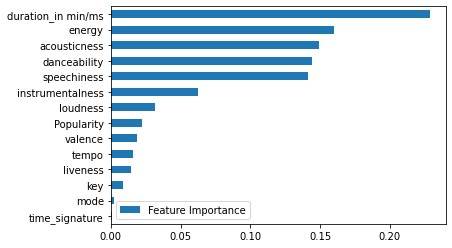

In [ ]:
model = RandomForestClassifier(
    criterion='entropy', max_depth=8, n_estimators=25,
    random_state=42)

model.fit(train_X,train_y)
y_pred = model.predict(test_X)

feat_importance = model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=list(train_X)).sort_values('Feature Importance').plot(kind='barh')

In [ ]:
feat_importance

array([0.02249723, 0.1440194 , 0.15973443, 0.03160924, 0.14123325,
       0.14919882, 0.06241807, 0.01456257, 0.01883171, 0.01586683,
       0.22857516, 0.00837176, 0.00220769, 0.00087381])

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver='liblinear',multi_class="auto")
log_model.fit(train_X, train_y)
y_pred = log_model.predict(test_X)

train_log = log_model.score(train_X, train_y)
test_log = log_model.score(test_X, test_y)

In [ ]:
train_log

0.939150401836969

In [ ]:
test_log

0.939150401836969

In [ ]:
m_log = confusion_matrix(test_y, y_pred)
log_byclass = m_log.diagonal()/m_log.sum(axis=1)
log_byclass = log_byclass.tolist()
log_byclass

[0.9837037037037037, 1.0, 0.5922330097087378]

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb_model = AdaBoostClassifier(
    n_estimators=150,
    learning_rate=0.4,
    random_state=42)

adb_model.fit(train_X, train_y)
y_pred = adb_model.predict(test_X)

train_adb = adb_model.score(train_X, train_y)
test_adb = adb_model.score(test_X, test_y)

In [ ]:
train_adb

0.9110218140068886

In [ ]:
test_adb

0.9024110218140069

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
                 'n_estimators': [10, 15, 20, 25, 30, 35, 40, 50, 100, 150],
                 'learning_rate': [0.2, 0.4, 0.5, 0.6, 0.8, 1],
             }

grid_clf_adb = GridSearchCV(adb_model, param_grid, cv=10, n_jobs=-1, refit = True)
grid_clf_adb.fit(train_X, train_y)

y_pred = grid_clf_adb.predict(test_X)

train_adb = grid_clf_adb.score(train_X, train_y)
test_adb = grid_clf_adb.score(test_X, test_y)

KeyboardInterrupt: 

In [ ]:
grid_clf_adb.best_estimator_

AdaBoostClassifier(learning_rate=0.8, n_estimators=25, random_state=42)

In [ ]:
train_adb

0.919345579793341

In [ ]:
test_adb

0.9115958668197475

In [ ]:
m_ada = confusion_matrix(test_y, y_pred)
ada_byclass = m_ada.diagonal()/m_ada.sum(axis=1)
ada_byclass = ada_byclass.tolist()
ada_byclass

[0.9881481481481481, 0.8494623655913979, 0.46601941747572817]

<AxesSubplot:>

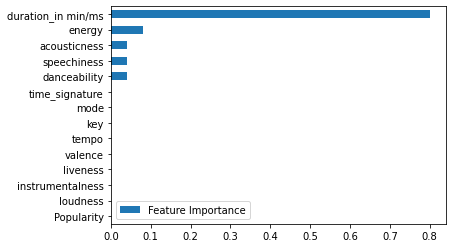

In [ ]:
model = AdaBoostClassifier(learning_rate=0.8, n_estimators=25, random_state=42)

model.fit(train_X,train_y)
y_pred = model.predict(test_X)

feat_importance = model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=list(train_X)).sort_values('Feature Importance').plot(kind='barh')

In [ ]:
from sklearn.ensemble import VotingClassifier


clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf2 = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=25,
                       random_state=42)
clf3 = AdaBoostClassifier(learning_rate=0.8, n_estimators=25, random_state=42)

### SVM

In [ ]:
from sklearn import svm
svm_model = svm.SVC(gamma="scale",kernel="rbf")
svm_model.fit(train_X, train_y)
y_pred = svm_model.predict(test_X)

train_svm = svm_model.score(train_X, train_y)
test_svm = svm_model.score(test_X, test_y)

In [ ]:
train_svm

0.9446039035591275

In [ ]:
test_svm

0.9368541905855339

In [ ]:
m_svm = confusion_matrix(test_y, y_pred)
svm_byclass = m_svm.diagonal()/m_svm.sum(axis=1)
svm_byclass = svm_byclass.tolist()
svm_byclass

[0.9866666666666667, 0.989247311827957, 0.5631067961165048]

### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(activation='tanh', hidden_layer_sizes=(20,), random_state=42)
mlp_model.fit(train_X, train_y)
y_pred = mlp_model.predict(test_X)

train_mlp = mlp_model.score(train_X, train_y)
test_mlp = mlp_model.score(test_X, test_y)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
train_mlp

0.9601033295063146

In [ ]:
test_mlp

0.9494833524684271

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
                'hidden_layer_sizes': [(10,30,10),(20,)],
                'activation': ['tanh', 'relu'],
                'solver': ['sgd', 'adam'],
                'alpha': [0.0001, 0.05],
                'learning_rate': ['constant','adaptive'],
             }

grid_clf_mlp = GridSearchCV(mlp_model, param_grid, cv=10, n_jobs=-1, refit = True)
grid_clf_mlp.fit(train_X, train_y)

y_pred = grid_clf_mlp.predict(test_X)

train_mlp = grid_clf_mlp.score(train_X, train_y)
test_mlp = grid_clf_mlp.score(test_X, test_y)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
grid_clf_mlp.best_estimator_

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(10, 30, 10),
              random_state=42)

In [ ]:
train_mlp

0.9649827784156142

In [ ]:
test_mlp

0.939150401836969

In [ ]:
m_mlp = confusion_matrix(test_y, y_pred)
mlp_byclass = m_mlp.diagonal()/m_mlp.sum(axis=1)
mlp_byclass = mlp_byclass.tolist()
mlp_byclass

[0.9837037037037037, 0.989247311827957, 0.6019417475728155]

In [ ]:
methods = ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'AdaBoost', 'SVM', 'MLP']
train_accuracy = [train_knn, train_tr, train_rf, train_log, train_adb, train_svm, train_mlp]
test_accuracy = [test_knn, test_tr, test_rf, test_log, test_adb, test_svm, test_mlp]
rock_accuracy = [knn_byclass[0], tr_byclass[0], rf_byclass[0], log_byclass[0], ada_byclass[0], svm_byclass[0], mlp_byclass[0]]
instrumental_accuracy = [knn_byclass[1], tr_byclass[1], rf_byclass[1], log_byclass[1], ada_byclass[1], svm_byclass[1], mlp_byclass[1]]
hiphop_accuracy = [knn_byclass[2], tr_byclass[2], rf_byclass[2], log_byclass[2], ada_byclass[2], svm_byclass[2], mlp_byclass[2]]

In [ ]:
zipped = list(zip(methods, test_accuracy, train_accuracy, rock_accuracy, instrumental_accuracy, hiphop_accuracy))
result = pd.DataFrame(zipped, columns=['Methods', 'Overall Training', 'Overall Testing', 'Rock', 'Instrumental', 'Hip Hop'])

In [ ]:
result.round(4).sort_values('Overall Testing', ascending=False)

,Methods,Overall Training,Overall Testing,Rock,Instrumental,Hip Hop
2,Random Forest,0.9392,0.9724,0.9926,0.9785,0.5534
6,MLP,0.9392,0.9650,0.9837,0.9892,0.6019
1,Decision Tree,0.9357,0.9512,0.9852,1.0000,0.5534
0,KNN,0.9323,0.9501,0.9852,0.9892,0.5340
5,SVM,0.9369,0.9446,0.9867,0.9892,0.5631
3,Logistic Regression,0.9392,0.9392,0.9837,1.0000,0.5922
4,AdaBoost,0.9116,0.9193,0.9881,0.8495,0.4660


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e4924ded-6215-4237-94b8-cc94e30e18e7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>